# 0.  Inicializar

In [12]:
# Se instala Pyspark,Pandas y findspark
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn
%pip install xgboost
%pip install shap 
%pip install lime 
%pip install dalex
%pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\moni1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor

from scipy.stats import skew, kurtosis

import lime
import lime.lime_tabular


In [14]:
# Cargar datos eliminando la columna indeseada (_c0)
df = pd.read_csv("car.csv", delimiter=",", index_col=0)

# Mostrar las primeras filas
print(df.head())


           exposure  clm  numclaims  claimcst0 veh_body  veh_age gender area  \
veh_value                                                                      
1.06       0.303901    0          0        0.0    HBACK        3      F    C   
1.03       0.648871    0          0        0.0    HBACK        2      F    A   
3.26       0.569473    0          0        0.0      UTE        2      F    E   
4.14       0.317591    0          0        0.0    STNWG        2      F    D   
0.72       0.648871    0          0        0.0    HBACK        4      F    C   

           agecat              _OBSTAT_  
veh_value                                
1.06            2  01101    0    0    0  
1.03            4  01101    0    0    0  
3.26            2  01101    0    0    0  
4.14            2  01101    0    0    0  
0.72            2  01101    0    0    0  


## I. Control de Calidad

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67856 entries, 1.06 to 1.02
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   exposure   67856 non-null  float64
 1   clm        67856 non-null  int64  
 2   numclaims  67856 non-null  int64  
 3   claimcst0  67856 non-null  float64
 4   veh_body   67856 non-null  object 
 5   veh_age    67856 non-null  int64  
 6   gender     67856 non-null  object 
 7   area       67856 non-null  object 
 8   agecat     67856 non-null  int64  
 9   _OBSTAT_   67856 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.7+ MB


## II. Eda

In [16]:
def generar_eda_completo(df, sample_fraction=0.2, corr_threshold=0.5, top_categories=10):
    """
    Realiza un Análisis Exploratorio de Datos (EDA) completo en un DataFrame de pandas.
    
    Parámetros:
        df (DataFrame): DataFrame de pandas a analizar.
        sample_fraction (float): Fracción de muestreo para cálculos costosos (0-1).
        corr_threshold (float): Umbral para destacar correlaciones significativas.
        top_categories (int): Número máximo de categorías a mostrar para variables categóricas.
    
    Retorna:
        dict: Diccionario con DataFrames y métricas de análisis.
    """
    eda_results = {}
    
    # 1. Información básica del DataFrame
    info_data = {
        "Número de Filas": df.shape[0],
        "Número de Columnas": df.shape[1],
        "Columnas Numéricas": list(df.select_dtypes(include=[np.number]).columns),
        "Columnas Categóricas": list(df.select_dtypes(include=["object", "category"]).columns)
    }
    eda_results["basic_info"] = pd.DataFrame(list(info_data.items()), columns=["Métrica", "Valor"])
    
    # 2. Estadísticas descriptivas para variables numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
        stats = df[numeric_cols].describe().T
        stats = stats.rename(columns={
            "mean": "Media",
            "std": "Desv. Estándar",
            "min": "Mínimo",
            "25%": "Q1",
            "50%": "Mediana",
            "75%": "Q3",
            "max": "Máximo"
        })
        eda_results["numeric_stats"] = stats.reset_index().rename(columns={"index": "Columna"})
    
    # 3. Análisis de correlación
    if len(numeric_cols) > 0:
        corr_matrix = df[numeric_cols].corr()
        correlations = corr_matrix.abs().unstack().reset_index()
        correlations.columns = ["Columna 1", "Columna 2", "Correlación"]
        correlations = correlations[correlations["Columna 1"] != correlations["Columna 2"]]
        correlations = correlations[correlations["Correlación"] > corr_threshold].sort_values(by="Correlación", ascending=False)
        eda_results["correlations"] = correlations
    
    # 4. Análisis de variables categóricas
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns
    if len(categorical_cols) > 0:
        cat_stats = []
        for col in categorical_cols:
            value_counts = df[col].value_counts().head(top_categories).to_dict()
            cat_stats.append({"Columna": col, "Valores Únicos": df[col].nunique(), "Top Categorías": value_counts})
        eda_results["categorical_stats"] = pd.DataFrame(cat_stats)
    
    # 5. Análisis de valores faltantes
    missing_values = df.isnull().sum().reset_index()
    missing_values.columns = ["Columna", "Valores Faltantes"]
    missing_values["Porcentaje Faltante"] = (missing_values["Valores Faltantes"] / df.shape[0]) * 100
    eda_results["missing_values"] = missing_values.sort_values(by="Valores Faltantes", ascending=False)
    
    # 6. Muestra de datos
    eda_results["sample_data"] = df.sample(min(5, len(df)))
    
    # 7. Distribución de datos
    if len(numeric_cols) > 0:
        sampled_df = df.sample(frac=sample_fraction)
        dist_data = []
        for col in numeric_cols:
            sampled_col = sampled_df[col].dropna()
            dist_data.append({
                "Columna": col,
                "Asimetría": sampled_col.skew(),
                "Curtosis": sampled_col.kurtosis(),
                "Distribución": sampled_col.describe().to_dict()
            })
        eda_results["distributions"] = pd.DataFrame(dist_data)
    
    return eda_results


In [17]:
eda = generar_eda_completo(df)

### i. Info Basica

In [18]:
eda["basic_info"].head()

,Métrica,Valor
0,Número de Filas,67856
1,Número de Columnas,10
2,Columnas Numéricas,"[exposure, clm, numclaims, claimcst0, veh_age,..."
3,Columnas Categóricas,"[veh_body, gender, area, _OBSTAT_]"


### ii. Estadisticos Numericos

In [19]:
eda["numeric_stats"]

,Columna,count,Media,Desv. Estándar,Mínimo,Q1,Mediana,Q3,Máximo
0,exposure,67856.0,0.468652,0.290025,0.002738,0.219028,0.44627,0.709103,0.999316
1,clm,67856.0,0.068144,0.251995,0.000000,0.000000,0.00000,0.000000,1.000000
2,numclaims,67856.0,0.072757,0.278204,0.000000,0.000000,0.00000,0.000000,4.000000
3,claimcst0,67856.0,137.270167,1056.297768,0.000000,0.000000,0.00000,0.000000,55922.129883
4,veh_age,67856.0,2.673529,1.067542,1.000000,2.000000,3.00000,4.000000,4.000000
5,agecat,67856.0,3.485484,1.425608,1.000000,2.000000,3.00000,5.000000,6.000000


### iii. Estadisticos Categoricos

In [20]:
eda["categorical_stats"]

,Columna,Valores Únicos,Top Categorías
0,veh_body,13,"{'SEDAN': 22233, 'HBACK': 18915, 'STNWG': 1626..."
1,gender,2,"{'F': 38603, 'M': 29253}"
2,area,6,"{'C': 20540, 'A': 16312, 'B': 13341, 'D': 8173..."
3,_OBSTAT_,1,{'01101 0 0 0': 67856}


Se nota que probablemente id_credito sea unico por mes ya que tenemos un periodo de 19 meses.

### iv. Correlaciones

In [21]:
display(eda["correlations"])

,Columna 1,Columna 2,Correlación
8,clm,numclaims,0.967107
13,numclaims,clm,0.967107


### v. Valores Faltantes

In [22]:
display(eda["missing_values"])

,Columna,Valores Faltantes,Porcentaje Faltante
0,exposure,0,0.0
1,clm,0,0.0
2,numclaims,0,0.0
3,claimcst0,0,0.0
4,veh_body,0,0.0
5,veh_age,0,0.0
6,gender,0,0.0
7,area,0,0.0
8,agecat,0,0.0
9,_OBSTAT_,0,0.0


### vi. Distribuccion

In [23]:
display(eda["distributions"])

,Columna,Asimetría,Curtosis,Distribución
0,exposure,0.169605,-1.136068,"{'count': 13571.0, 'mean': 0.4705201649157247,..."
1,clm,3.441278,9.843843,"{'count': 13571.0, 'mean': 0.06771792793456635..."
2,numclaims,4.075573,18.431675,"{'count': 13571.0, 'mean': 0.07221280672021221..."
3,claimcst0,17.977379,472.236066,"{'count': 13571.0, 'mean': 146.13289658246558,..."
4,veh_age,-0.222331,-1.209330,"{'count': 13571.0, 'mean': 2.6776213985704813,..."
5,agecat,0.047967,-0.851378,"{'count': 13571.0, 'mean': 3.4930366222091225,..."


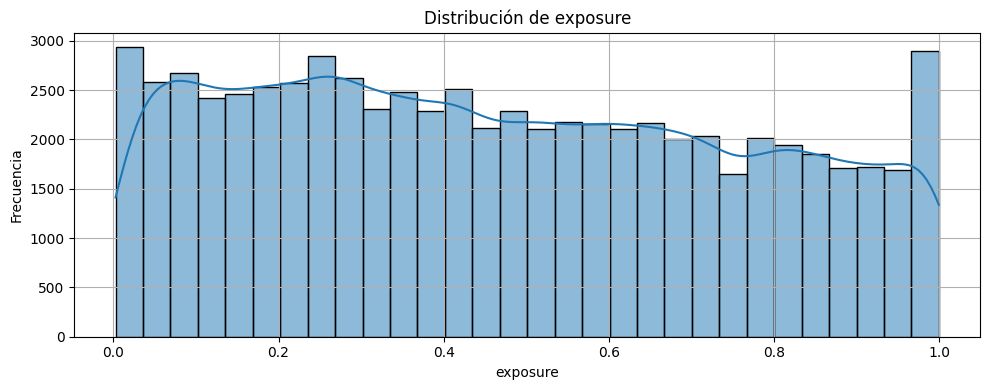

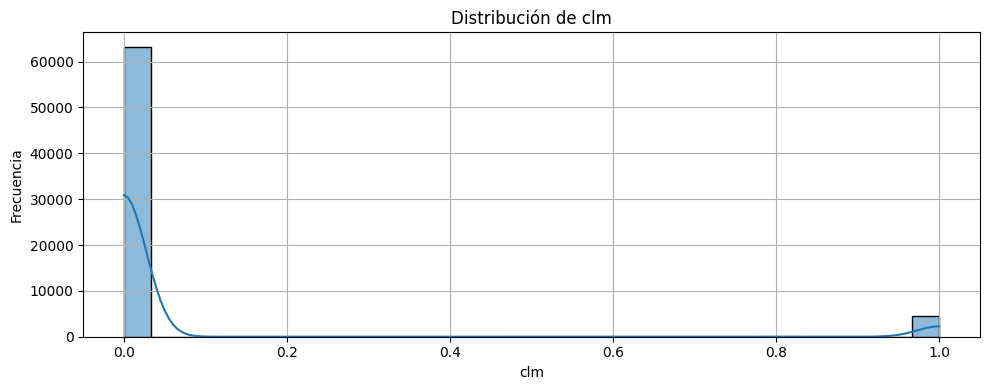

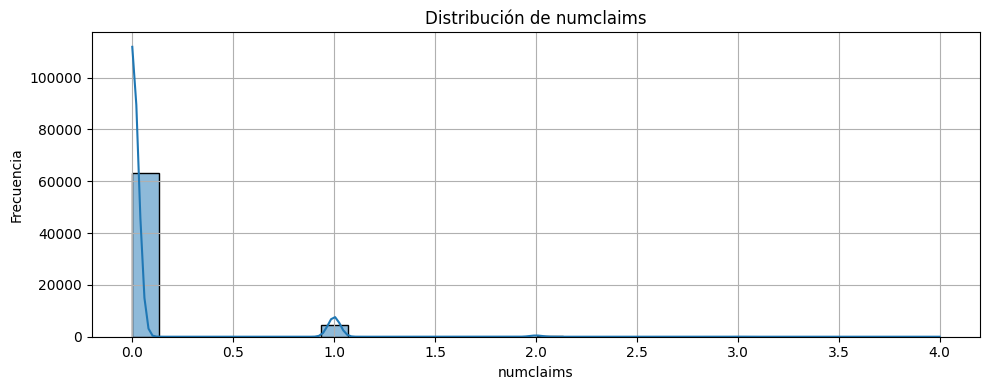

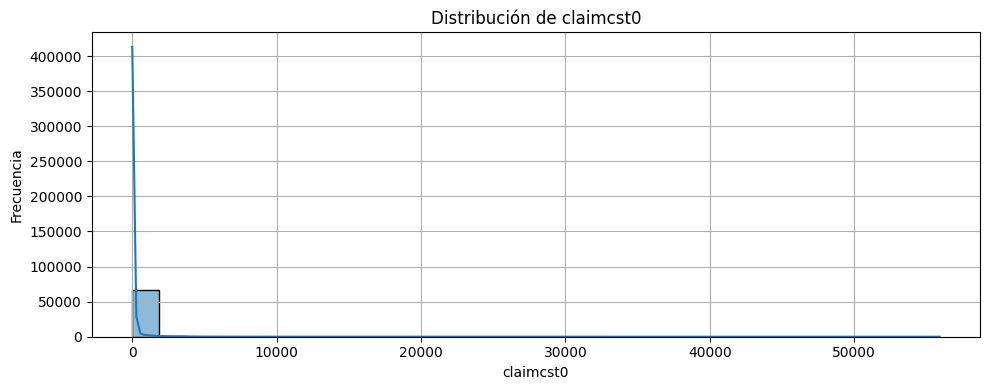

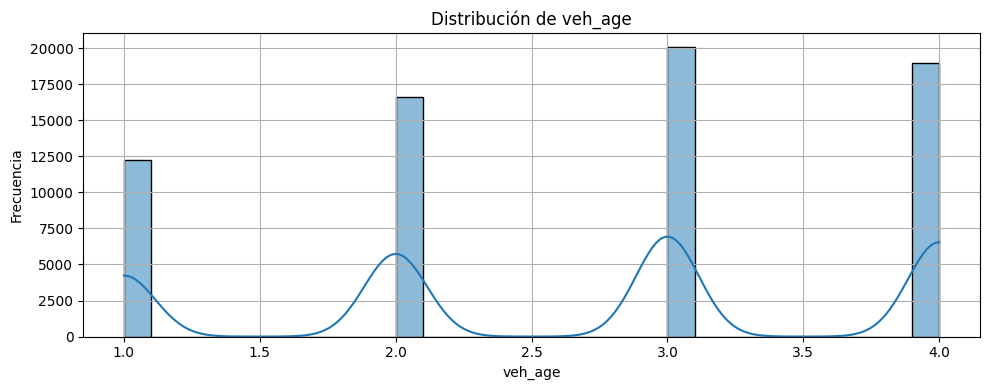

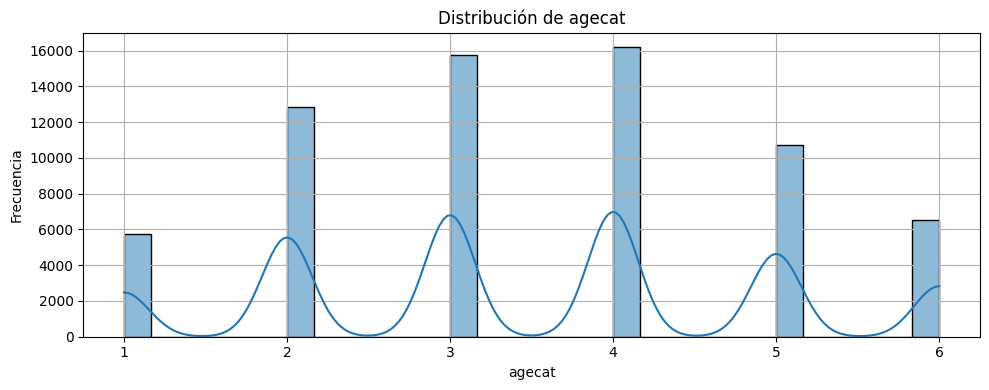

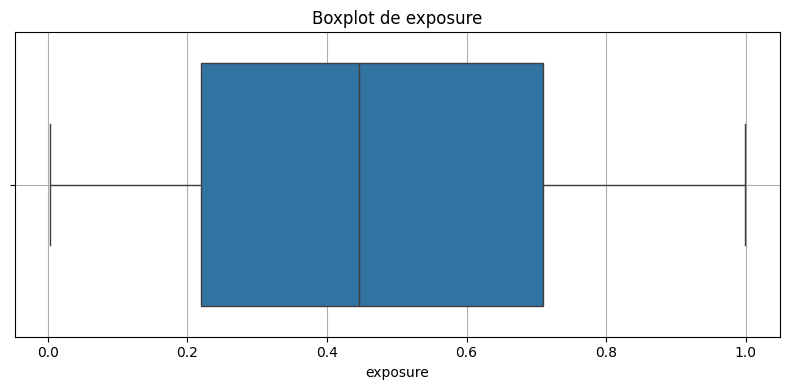

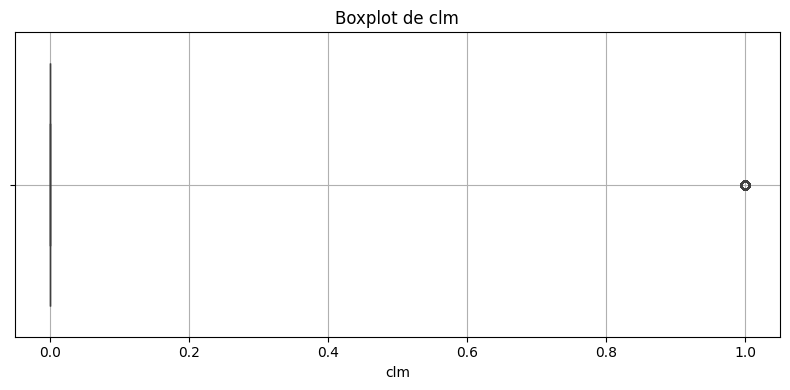

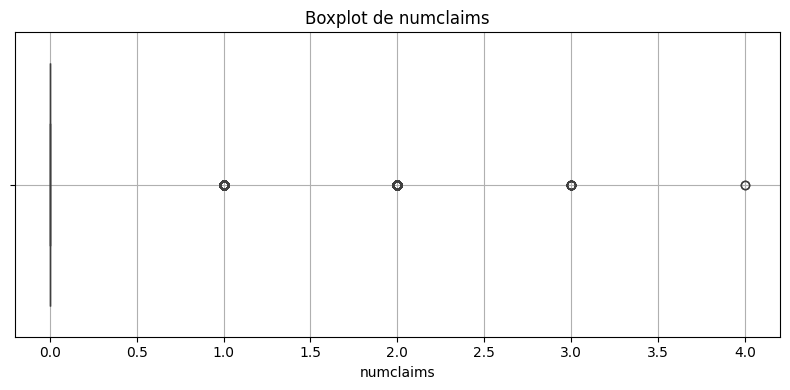

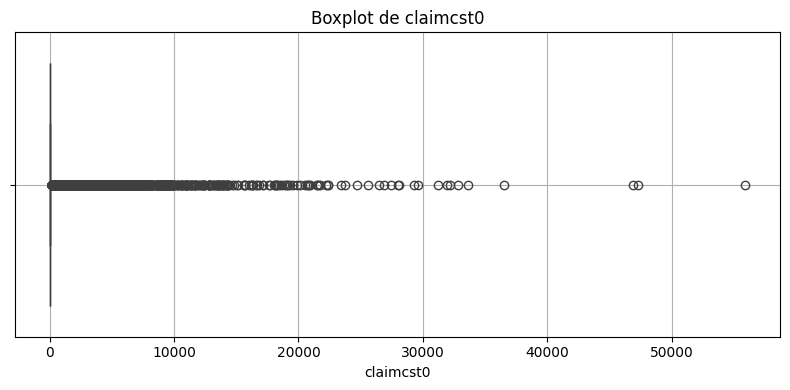

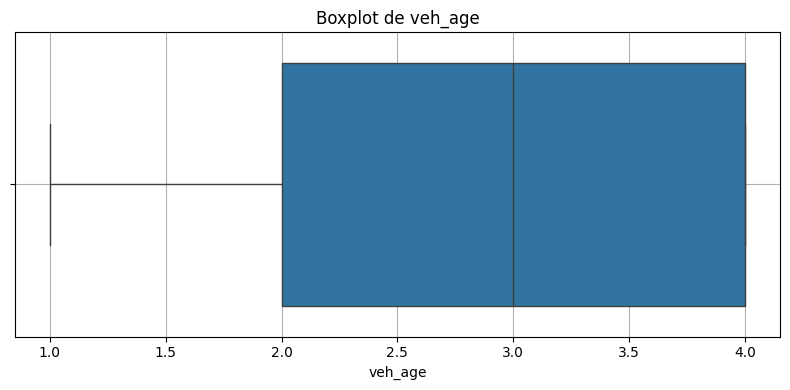

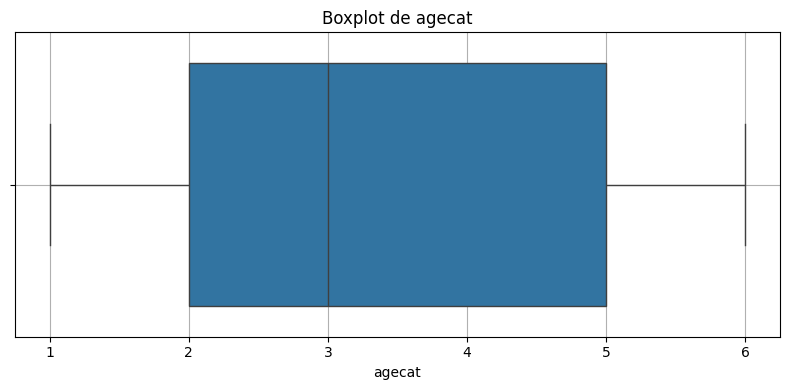

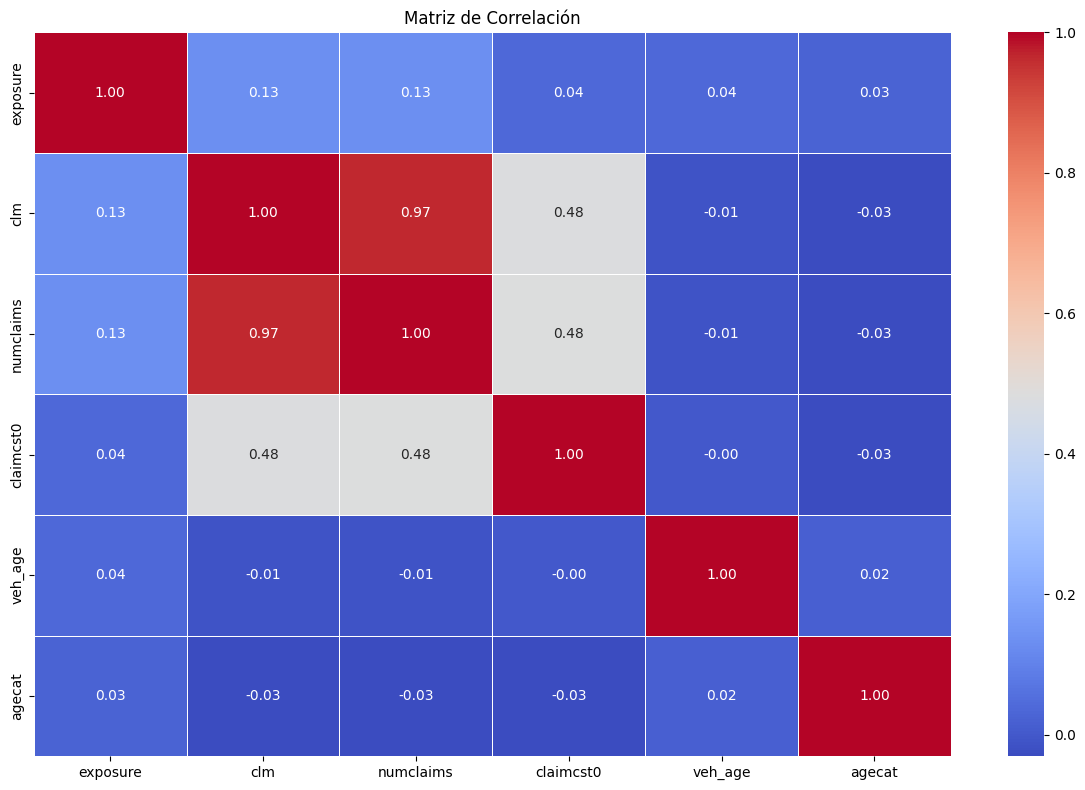

,Skewness,Kurtosis
exposure,0.175554,-1.142501
clm,3.427516,9.747868
numclaims,4.067288,18.504311
claimcst0,17.502116,479.890242
veh_age,-0.213138,-1.202100
agecat,0.058075,-0.851871


In [24]:
# ------------------ Análisis Descriptivo Visual ------------------

# Selección de variables numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# 1. Histogramas / Distribuciones
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2. Boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Mapa de calor de correlación
plt.figure(figsize=(12, 8))
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# 4. Pairplot (si hay pocas variables)
if len(numeric_cols) <= 5:
    sns.pairplot(df[numeric_cols])
    plt.suptitle('Pairplot entre variables numéricas', y=1.02)
    plt.show()

# 5. Skew y Kurtosis
skew_kurt = pd.DataFrame({
    'Skewness': df[numeric_cols].apply(skew),
    'Kurtosis': df[numeric_cols].apply(kurtosis)
})
display(skew_kurt)
